**Importing The Model Building Libraries**

In [ ]:
#import keras libraries
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten

In [ ]:
model=Sequential()

In [ ]:
# add Convolutional layer
model.add(Conv2D(32, (3,3), activation = "relu", input_shape = (64,64,3) ))
#1St parameter =no of features detectors 2nd& 3rd =Size of feature detector, 
#4th input image size,5 th parameter is channel for color=3 gray scale=1,6 th to avoid negative pixels we use activation function

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# add flatten layer
model.add(Flatten())

In [ ]:
model.add(Dense(units=128, activation='relu'))

In [ ]:
model.add(Dense(units=46, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
# configure the learning process
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# configure the learning process
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Data Collection/training",target_size=(64,64),batch_size=32, color_mode="rgb",class_mode="sparse")
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/Data Collection/testing",target_size=(64,64),batch_size=32, color_mode="rgb",class_mode="sparse")  

In [ ]:
model.fit(x_train, epochs=10, steps_per_epoch=len(x_train))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model.save("forestfire13.h5")

In [ ]:
# import load_model from keras.model
from keras.models import load_model
# import image class from keras
from tensorflow.keras.preprocessing import image
# import numpy
import numpy as np
# import cv2
import cv2

In [ ]:
model = load_model("forestfire13.h5")

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/Data Collection/training/Forest with fire/with fire (10).jpg')
x = image.img_to_array(img)
res = cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)

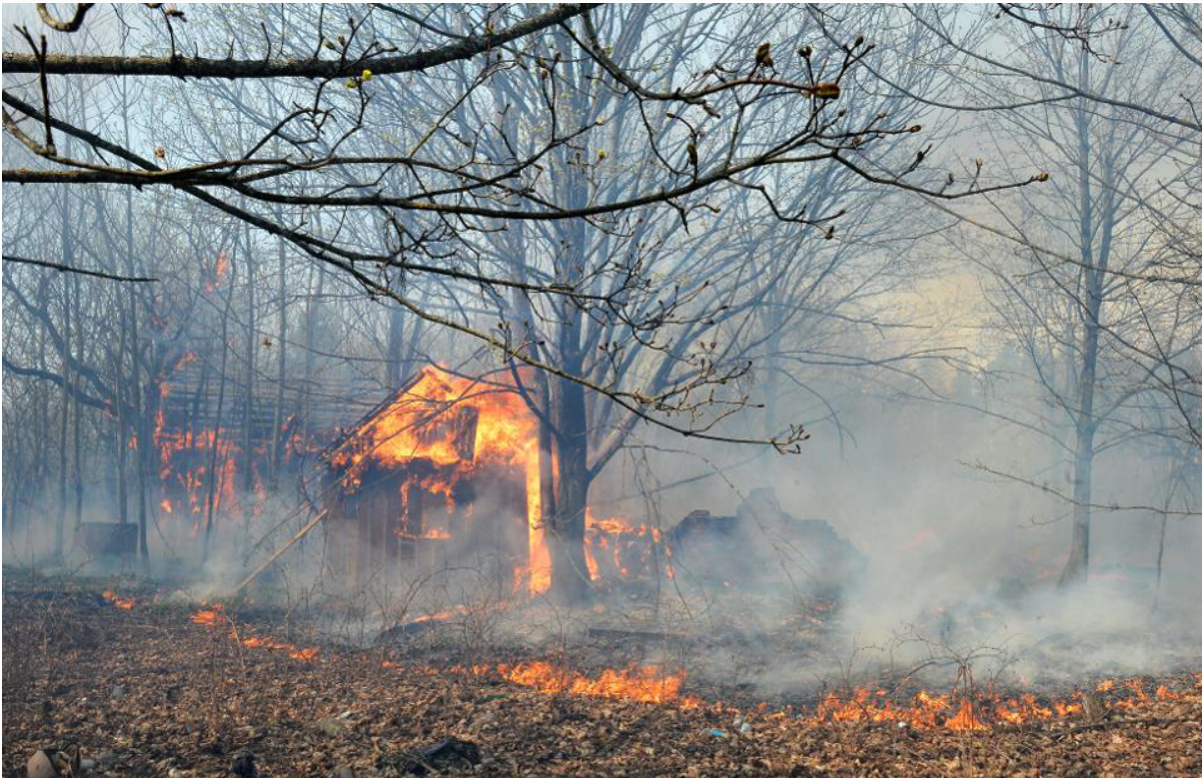

In [ ]:
x = np.expand_dims(x,axis = 0)
pred = model.predict(x_train)
pred

In [ ]:
img = image.load_img(r'/content/drive/MyDrive/Data Collection/testing/Forest without fire/0.48007200_1530881924_final_forest.jpg')
x = image.img_to_array(img)
res = cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)

In [ ]:
# import opencv library
import cv2
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
from twilio.rest import Client
from playsound import playsound

In [ ]:
# load the saved model
model = load_model(r'forestfire13.h5')
# define video
video = cv2.VideoCapture(0)
# define the featues
name = ['forest','with fire']